## Time Series Data Analysis: Recurrent Neural Network

In this notebook I am using RNN model for time series data analysis. For this practice
case I used housing price data of single family house in Austin, TX from Quandl. Data sets cover the time from 02/1997 to 09/2017. I split the data as Training and Test sets such as by training the RNN model using data before 2016 and test the model on the set of data those from 2016 and 2017. Important point here is I am focused on direction taken by the predection not the closeness of predicted values. 

##################################################################
First import the required libraries and set the matplotlib inline.
##################################################################

In [108]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

###################################################################
Let's import the training data set. As I already mention that took
data before 2016 as model traing purpose.
###################################################################

In [109]:
train_data = pd.read_csv("Austin-single-family-house-price-Train.csv")

######################################################################
Select the data column as numpyarray
######################################################################

In [110]:
training_data = train_data.iloc[:,1:2].values

In [111]:
type(training_data)

numpy.ndarray

#####################################################################
Feature Scaling: Using Normalization
######################################################################

In [112]:
from sklearn.preprocessing import MinMaxScaler

In [113]:
scalar = MinMaxScaler(feature_range = (0,1))

In [114]:
training_data_scale = scalar.fit_transform(training_data)

//anaconda/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


###########################################################################
Creating data structure with 3 timesteps and 1 output:
Each time t, RNN model will look 3 earlier data (3 months) and predicts new output.
############################################################################

In [115]:
X_train = []
y_train = []
for i in range(3, 227):
    X_train.append(training_data_scale[i-3:i, 0])
    y_train.append(training_data_scale[i, 0])

In [116]:
X_train = np.array(X_train)
y_train = np.array(y_train)

###############################################################################
Reshaping data: Adding indicator
###############################################################################

In [117]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

###############################################################################
So far I finished the pre-processing.
Building the RNN Model
###############################################################################

Importing Keras libraries and packages

In [118]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Initializing RNN

In [119]:
regressor = Sequential()

Adding the first LSTM layer and some Dropout regularization

In [120]:
regressor.add(LSTM(units = 75, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

Adding the second LSTM layer and some Dropout regularization

In [121]:
regressor.add(LSTM(units = 75, return_sequences = True))
regressor.add(Dropout(0.2))

Adding the third LSTM layer and some Dropout regularization

In [122]:
regressor.add(LSTM(units = 75, return_sequences = True))
regressor.add(Dropout(0.2))

Adding the fourth LSTM layer and some Dropout regularization

In [123]:
regressor.add(LSTM(units = 75, return_sequences = True ))
regressor.add(Dropout(0.2))

Adding the fifth layer and some Dropout regularization

In [124]:
#regressor.add(LSTM(units = 100, return_sequences = True ))
#regressor.add(Dropout(0.2))

Adding sixth layer and Dropout regularization

In [125]:
regressor.add(LSTM(units = 75))
regressor.add(Dropout(0.2))

Adding output layer

In [126]:
regressor.add(Dense(units=1))

Compling RNN:

In [127]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

Fitting RNN to training set

In [128]:
regressor.fit(X_train, y_train, epochs=80, batch_size=32)


Epoch 1/80
224/224 [==============================] - 8s - loss: 0.1326     
Epoch 2/80
224/224 [==============================] - 0s - loss: 0.0730     
Epoch 3/80
224/224 [==============================] - 0s - loss: 0.0452     
Epoch 4/80
224/224 [==============================] - 0s - loss: 0.0374     
Epoch 5/80
224/224 [==============================] - 0s - loss: 0.0329     
Epoch 6/80
224/224 [==============================] - 0s - loss: 0.0271     
Epoch 7/80
224/224 [==============================] - 0s - loss: 0.0207     
Epoch 8/80
224/224 [==============================] - 0s - loss: 0.0117     
Epoch 9/80
224/224 [==============================] - 0s - loss: 0.0042     
Epoch 10/80
224/224 [==============================] - 0s - loss: 0.0046     
Epoch 11/80
224/224 [==============================] - 0s - loss: 0.0039     
Epoch 12/80
224/224 [==============================] - 0s - loss: 0.0030     
Epoch 13/80
224/224 [==============================] - 0s - loss: 0.0036 

#################################################################
Making the prediction:
##################################################################

In [129]:
test_data = pd.read_csv('Austin-single-family-house-price-Test.csv')

In [130]:
real_house_price = test_data.iloc[:, 1:2].values

#####################################################################
Getting predicted house price
#####################################################################

In [131]:
dataset_total = pd.concat((train_data['Value'], test_data['Value']), axis=0)
inputs = dataset_total[len(dataset_total) - len(test_data) - 3:].values
inputs = inputs.reshape(-1,1)
inputs = scalar.transform(inputs)
X_test = []
for i in range(3, 24):
    X_test.append(inputs[i-3:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_house_price = regressor.predict(X_test)
predicted_house_price = scalar.inverse_transform(predicted_house_price)

#########################################################################
Visualization:
##########################################################################

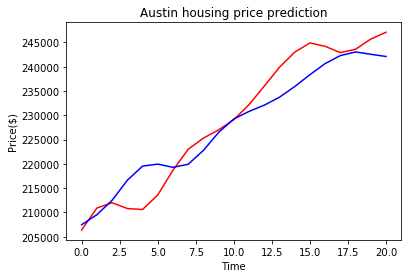

In [132]:
plt.plot(real_house_price, color = 'red', label = 'Real Austin house price')
plt.plot(predicted_house_price, color = 'blue', label = 'Predicted Austin house price')
plt.title('Austin housing price prediction')
plt.xlabel('Time')
plt.ylabel('Price($)')

This is great ?  This Model captured the real train of data but slowly due to 
non linearity of data.If we have enough data points to train the model then we will be able to capture real time prediction. 

In [133]:
import math
from sklearn.metrics import mean_squared_error
RMSE = math.sqrt(mean_squared_error(real_house_price, predicted_house_price))
RMSE

4197.98656677466